<a href="https://colab.research.google.com/github/JuniorGunner/DataScienceFormation/blob/master/Intro/DataScienceIntro_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
""" Class 3 using new dataset from TMDB hosted on Kaggle
https://www.kaggle.com/tmdb/tmdb-movie-metadata/ 

Upload and read movies.csv"""

import pandas as pd

tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head() # Show first 5 records

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
""" Getting unique original languages 
(variável categórica nominal)

Ex.: Categórica ordinal - primeiro grau < segundo grau < terceiro grau """
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [12]:
""" Getting unique votes average """
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [13]:
""" Counting language ocurrences """
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ta       2
ro       2
cs       2
id       2
ar       2
nb       1
hu       1
ps       1
ky       1
sl       1
is       1
no       1
el       1
te       1
tr       1
af       1
pl       1
xx       1
vi       1
Name: original_language, dtype: int64

In [14]:
""" Creating a dataframe """
tmdb.original_language.value_counts().to_frame().head()

,original_language
en,4505
fr,70
es,32
zh,27
de,27


In [15]:
""" Adding numerical index column """
tmdb.original_language.value_counts().to_frame().reset_index().head()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [16]:
""" Renaming columns """
lg_count = tmdb.original_language.value_counts().to_frame().reset_index()
lg_count.columns = ['original_language', 'total']
lg_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


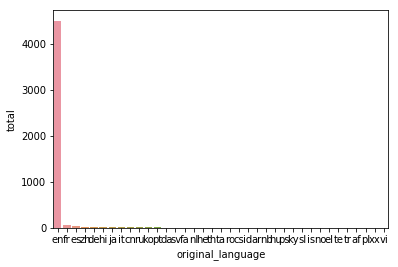

In [17]:
""" Seaborn bar plot """
import seaborn as sns
sns.barplot(x = 'original_language', y = 'total', data = lg_count)

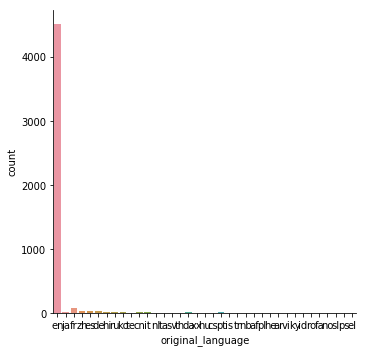

In [18]:
""" Using catplot with raw data """
sns.catplot(x = 'original_language', kind = 'count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7f5e5dda1b70>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

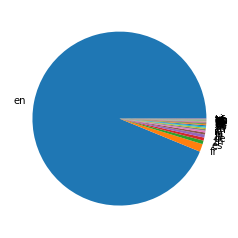

In [19]:
""" Matplotlib pie chart """
import matplotlib.pyplot as plt
plt.pie(lg_count['total'], labels = lg_count['original_language'])

In [20]:
""" Total per language using 'locate' """
count_per_lg = tmdb.original_language.value_counts()
count_per_lg.loc["en"]

4505

In [21]:
""" Separating english from the rest """
count_per_lg = tmdb.original_language.value_counts()
count_total = count_per_lg.sum() # Total of languages
english_total = count_per_lg.loc["en"] # Total of english
rest_total = count_total - english_total
print(english_total, rest_total)

4505 298


In [22]:
""" Creating a dict to the 2 categories """
data = {
    'language': ['english', 'others'],
    'total': [english_total, rest_total]
}

pd.DataFrame(data)

,language,total
0,english,4505
1,others,298


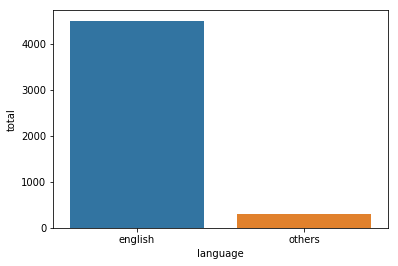

In [23]:
""" Plotting """
data = pd.DataFrame(data)
sns.barplot(data = data, x = 'language', y = 'total')

([<matplotlib.patches.Wedge at 0x7f5e5dc24748>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'english'),
  Text(1.0791697511565306, -0.2130555049482467, 'others')])

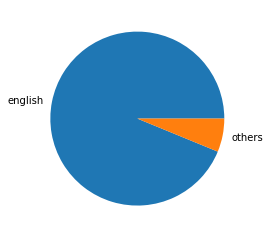

In [24]:
""" Pie plotting """
plt.pie(data['total'], labels = data['language'])

In [0]:
""" All other languages """
all_other = tmdb.query("original_language != 'en'").original_language.value_counts()

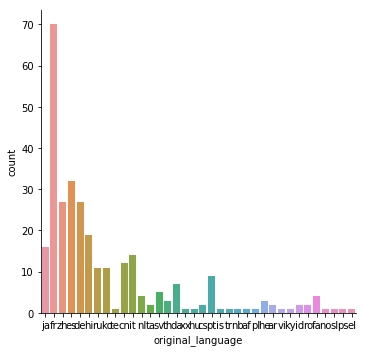

In [26]:
""" Plotting """
other_language_movies = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", data = other_language_movies, kind = "count")


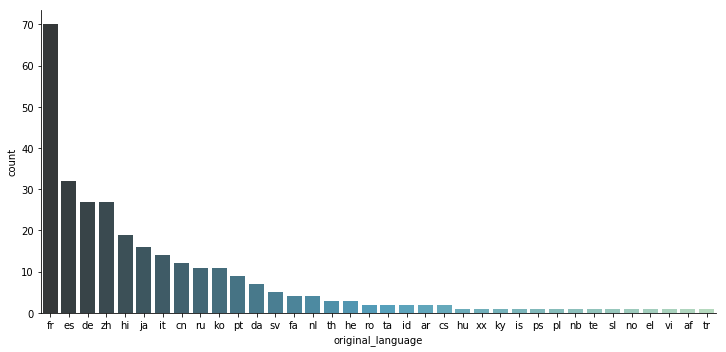

In [37]:
""" Adjusting size, sorting """
# plt.figure(figsize=5,10) # SyntaxError: positional argument follows keyword argument
sns.catplot(
    x = "original_language", 
    data = other_language_movies, 
    kind = "count", 
    aspect = 2,
    palette = "GnBu_d",
    order = all_other.index
)

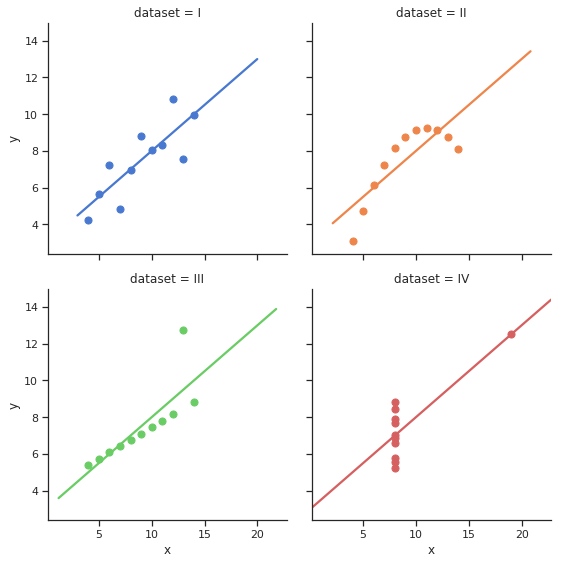

In [38]:
""" Linear chart example """
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})